In [1]:
# Run this cell to make the emphasized text red and use the full width of the screen
from IPython.core.display import HTML
HTML('<style>em { color: red; }</style> <style>.container {width:100% !important; }</style>')

In [2]:
# import statements
import sqlite3
import os

import pandas as pd
from pandas import DataFrame, Series

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["font.size"] = 16

import math

import requests

In [3]:
# TODO: read "fire_hydrants.csv" into a DataFrame
hdf = pd.read_csv("fire_hydrants.csv")
hdf.tail()

X          Y  OBJECTID CreatedBy               CreatedDate  \
10104 -89.439367  43.040481    286329     WUJAG  2018-08-13T18:03:33.000Z   
10105 -89.426303  43.067854    286330     WUJAG  2018-08-13T18:14:14.000Z   
10106 -89.445461  43.053305    286729     WUJAG  2018-08-15T16:37:18.000Z   
10107 -89.388849  43.068576    286730     WUJAG  2018-08-15T16:51:54.000Z   
10108 -89.518896  43.062062    287129     WUJAG  2018-08-20T18:54:01.000Z   

      LastEditor                LastUpdate      FacilityID DataSource  \
10104      WUJAG  2018-08-13T18:04:02.000Z  HYDR-3964-4053         TC   
10105      WUJAG  2018-08-13T18:17:45.000Z  HYDR-4253-4054         TC   
10106      WUJAG  2018-08-15T16:39:24.000Z  HYDR-3859-4055         TC   
10107      WUJAG  2018-08-15T16:59:15.000Z  HYDR-5052-4056         TC   
10108      WUJAG  2018-08-20T19:27:16.000Z      -2355-4057       FASB   

      ProjectNumber  ... Elevation Manufacturer Style  year_manufactured  \
10104     1-1830-19  ...       NaN     WATEROUS   NaN             2018.0   
10105     1-1830-19  ...       NaN     WATEROUS   NaN             2017.0   
10106     1-1830-19  ...       NaN     WATEROUS   NaN             2000.0   
10107     1-1830-19  ...       NaN     WATEROUS   NaN             2017.0   
10108           NaN  ...       NaN          NaN   NaN                NaN   

      BarrelDiameter  SeatDiameter Comments nozzle_color  \
10104            5.0           NaN      NaN          NaN   
10105            5.0           NaN      NaN          NaN   
10106            5.0           NaN      NaN          NaN   
10107            5.0           NaN      NaN          NaN   
10108            NaN           NaN      NaN          NaN   

                MaintainedBy  InstallType  
10104  MADISON WATER UTILITY          NaN  
10105  MADISON WATER UTILITY          NaN  
10106  MADISON WATER UTILITY          NaN  
10107  MADISON WATER UTILITY          NaN  
10108                PRIVATE          NaN  

[5 rows x 25 columns]

## Warmup

Text(0, 0.5, 'Number of Hydrants')

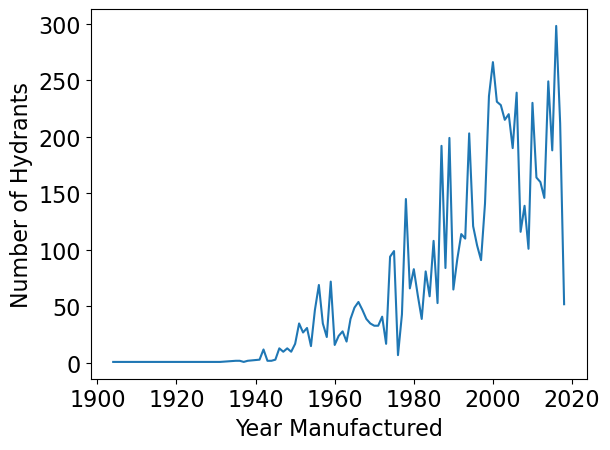

In [4]:
## Warmup 1: Create a line plot with 'year_manufactured' on the x axis and a count of the number of hydryants on the y axis.  Label the axes.

ax=hdf.value_counts('year_manufactured').sort_index().plot.line()
ax.set_xlabel("Year Manufactured")
ax.set_ylabel("Number of Hydrants")

<Axes: xlabel='Manufactured Decade'>

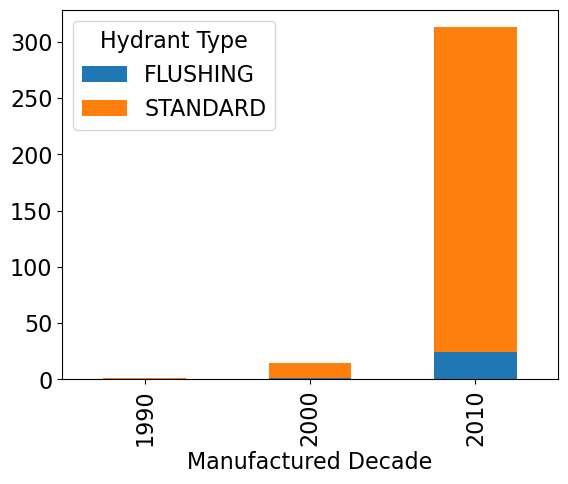

In [5]:
## Warmup 2: Create a stacked bar blot.  The x axis should be the decade of the 'year_manufactured'  The y axis should be the counts of the different `HydrantType`s for each decaded

data=pd.DataFrame(hdf['year_manufactured']//10*10)
data.columns=['Manufactured Decade']
data['Hydrant Type']=hdf['HydrantType']
data = data.dropna()
data['Manufactured Decade']=data['Manufactured Decade'].apply(lambda d: int(d))
data=data.value_counts().unstack()


data.plot.bar(stacked=True)

# Plotting 4

* Late days may not be used on P13
* Everything is due on Wednesday - send me an email if you have special circumstances


### Exam Conflict Form
* [Final - December 14, 7:25 pm - 9:25 pm](https://docs.google.com/forms/d/e/1FAIpQLSfJmpjKaM3t8iOwBTGAWI6jKZUqGI1Matz3bidhSbFu_c4_2g/viewform)

### Reading
* [Reading 1](https://cs220.cs.wisc.edu/s23/materials/readings/matplotlib-intro.html)
* [Reading 2](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)

## Learning objectives
- how to use logarithmic axes
- how to create multiple plots within same figure

### Logarithmic scale
- math.log(y, base)
- find an x, such that 10**x == y
    - math.log10(y)

In [6]:
print(math.log10(1000))
print(math.log10(1000000))

3.0
6.0


In [7]:
print(math.log(32, 2))
print(math.log(256, 4))

5.0
4.0


In [8]:
def log_approx(y):
    assert type(y) == int
    assert y >= 1
    return len(str(y))

In [9]:
print(log_approx(123456789)) # What will this output?
print(math.log10(123456789))

9
8.09151497716927


In [10]:
print(log_approx(989898))
print(math.log10(989898))

6
5.995590446800246


In [11]:
errors = []
for y in range(1, 1000001):
    err = abs(log_approx(y) - math.log10(y))
    errors.append(err)
max(errors)

1.0

### Why does this matter?
- Comparing two numbers:
     - 134234255623423423423432423432432432
     - 2342343252523

- Eventually I don't care what the number is, but only counting the number of digits in the number to know how big the number is!
- log base 2: counting how many bits we need
- log base 10: 10 digits 0 through 9!

<Axes: >

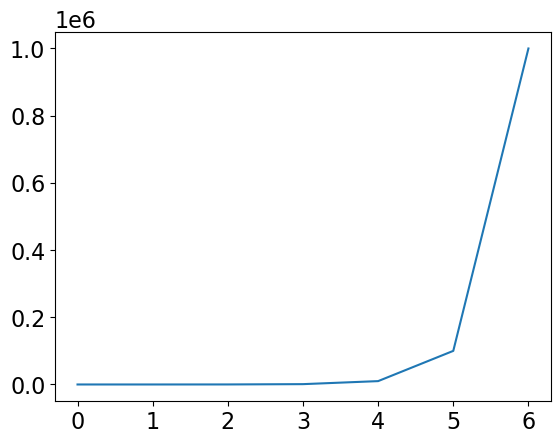

In [12]:
s = Series([1, 10, 100, 1000, 10000, 100000, 1000000])
s.plot.line()

<Axes: >

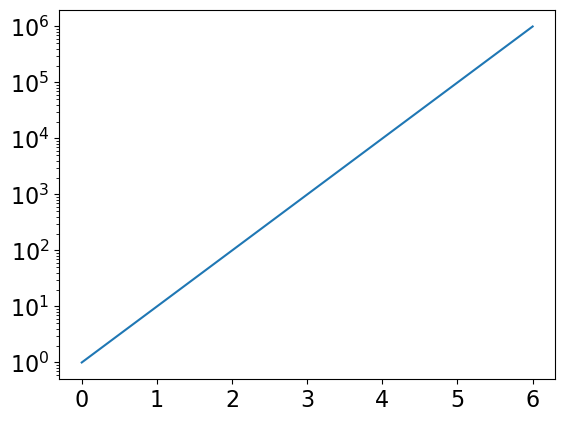

In [13]:
s.plot.line(logy=True)

### Population example
https://ourworldindata.org/grapher/population

In [14]:
populations = pd.Series({
        "China":1439323776,
        "India": 1380004385,
        "Mexico": 128932753,
        "Senegal":16743927,
        "Bahrain":1701575,
        "Grenada":112523,
        "Tuvalu": 11792
})

Plot populations as a bar chart.

<Axes: >

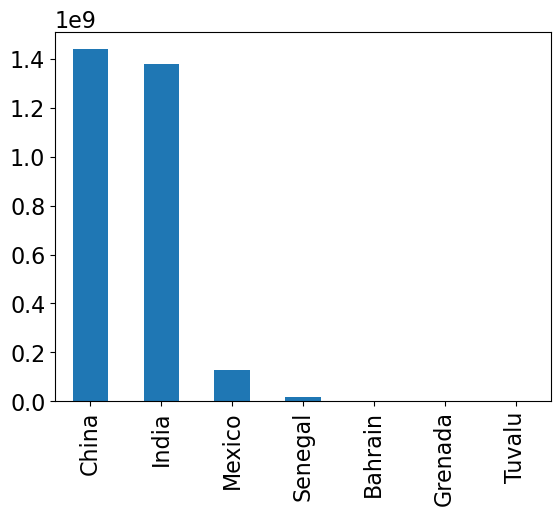

In [15]:
# not that readable
populations.plot.bar()

Now plot on a logarithmic scale.

<Axes: >

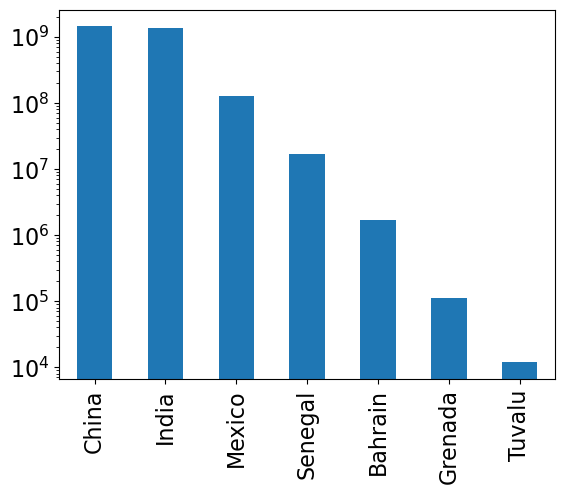

In [17]:
populations.plot.bar(logy=True)

### Multiple *axessubplots* in the same plot with plt.subplots

```
fig,axes = plt.subplots()
```

* `nrows` and `ncols` -- specify the number of subplots along the rows and columns
* `sharex` and `sharey` -- boolean parameters to define if subplots use the same values along their axes
* Use the multi-indexed `axes` returned value to put a plot into each of the subplots

(<Figure size 640x480 with 1 Axes>, <Axes: >)

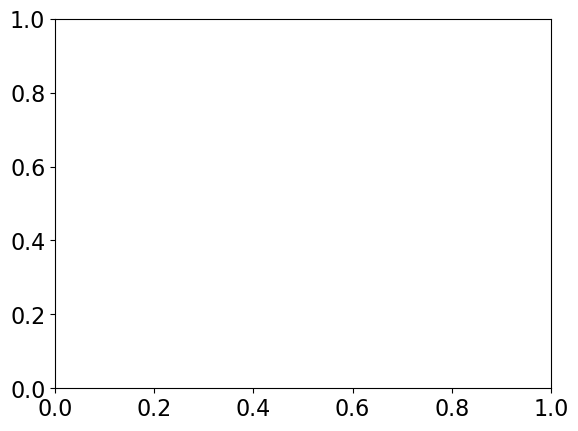

In [18]:
plt.subplots()  # default is to create one 

(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

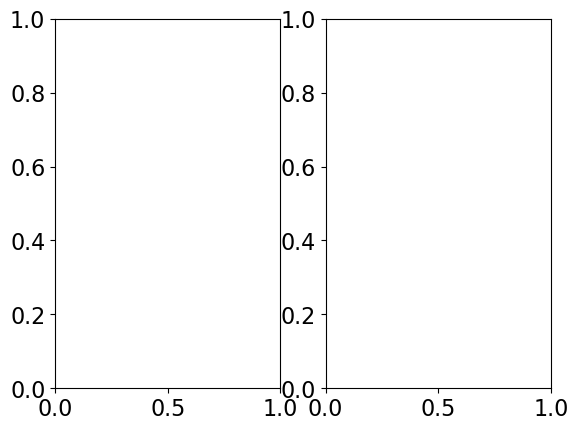

In [19]:
plt.subplots(ncols=2)

(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

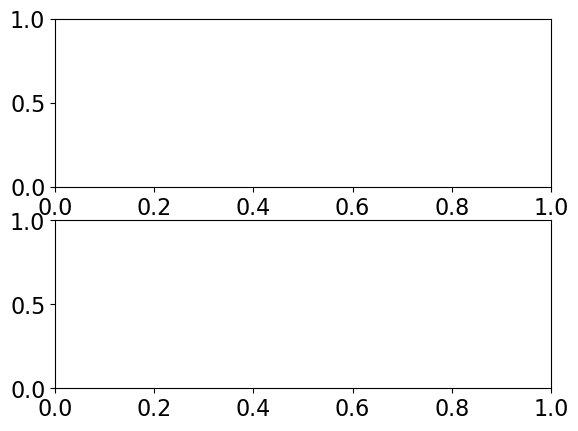

In [20]:
plt.subplots(nrows=2)

(<Figure size 1000x400 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

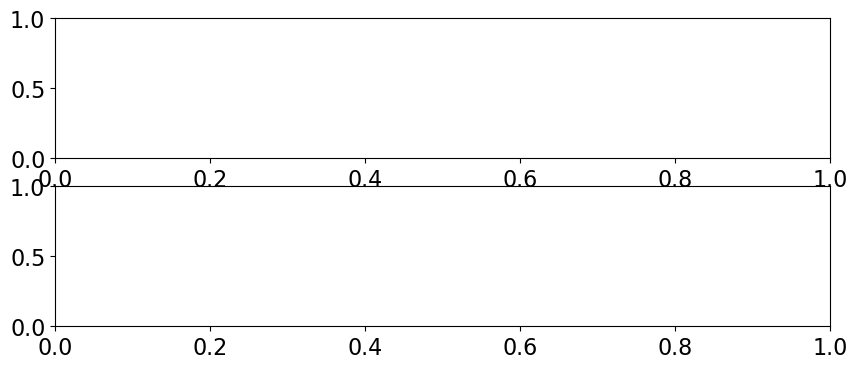

In [21]:
plt.subplots(nrows=2,figsize=(10,4))

In [23]:
s1 = Series([1, 2, 3, 3, 4])
s2 = Series([5, 7, 7, 8])

Let's create a single plot with two sub figures (line plots) and plot s1 on the left and s2 on the right.

<Axes: >

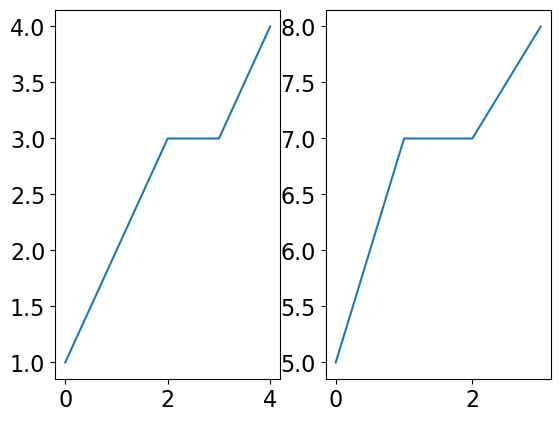

In [24]:
fig, axes = plt.subplots(ncols = 2)
# axes[0] # the area on the left
# axes[1] # the area on the right
s1.plot.line(ax=axes[0])
s2.plot.line(ax=axes[1])

What is wrong with the plots above?

The y-axes are misleading.  Use the `sharex` and `sharey` parameters

<Axes: >

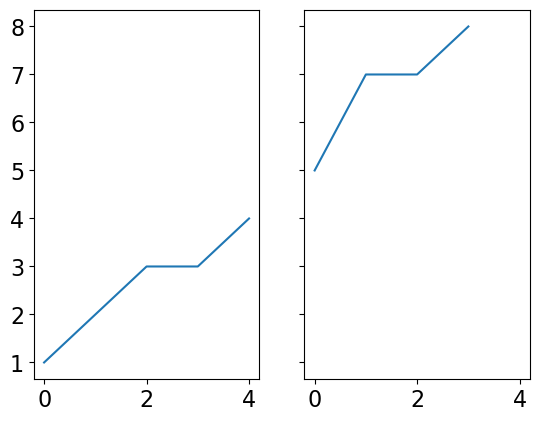

In [25]:
# fix the misleading y axes
fig, axes = plt.subplots(ncols = 2,sharey=True,sharex=True)
# axes[0] # the area on the left
# axes[1] # the area on the right
s1.plot.line(ax=axes[0])
s2.plot.line(ax=axes[1])


### Iris dataset

In [26]:
# Gather the data.
resp = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
resp.raise_for_status()

iris_f = open("iris.csv", "w")
iris_f.write(resp.text)
iris_f.close()

iris_df = pd.read_csv("iris.csv",
                 names = ["sep-len", "sep-wid", "pet-len", "pet-wid", "class"])
iris_df.head()

sep-len  sep-wid  pet-len  pet-wid        class
0      5.1      3.5      1.4      0.2  Iris-setosa
1      4.9      3.0      1.4      0.2  Iris-setosa
2      4.7      3.2      1.3      0.2  Iris-setosa
3      4.6      3.1      1.5      0.2  Iris-setosa
4      5.0      3.6      1.4      0.2  Iris-setosa

<Axes: xlabel='sep-len', ylabel='sep-wid'>

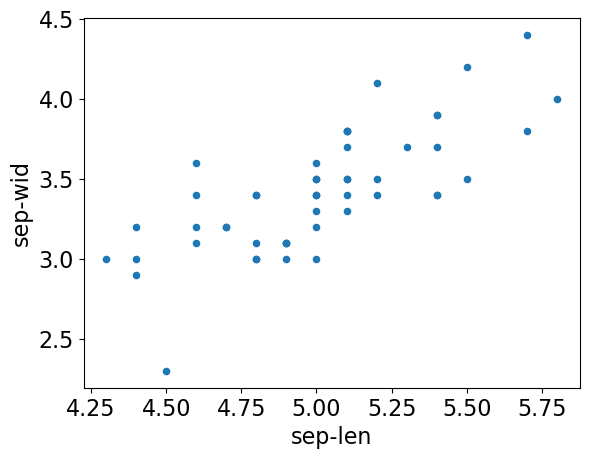

In [29]:
# for the `Iris-setosa` class, plot the sepal length vs sepal width

iris_df[iris_df['class']=='Iris-setosa'].plot.scatter(x='sep-len',y='sep-wid')


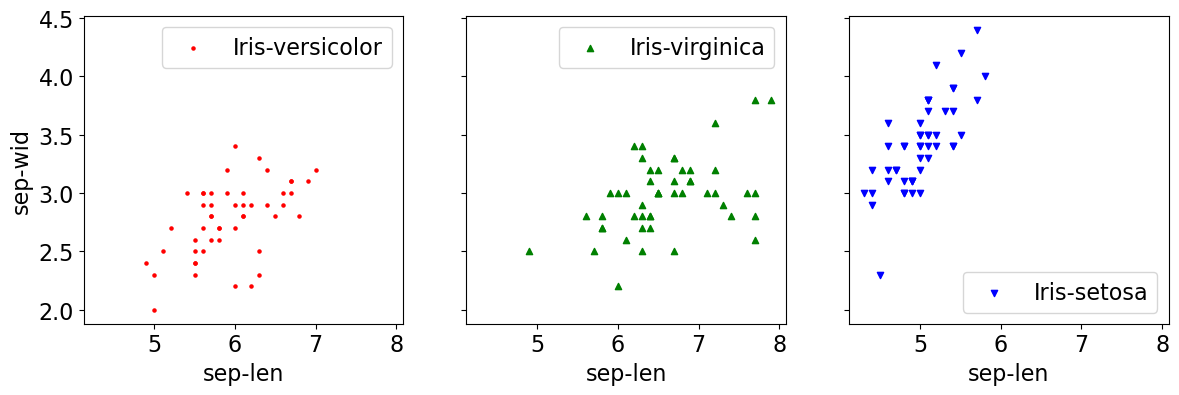

In [38]:

colors = ["r", "g", "b"]
markers = [".", "^", "v"]

varieties = list(set(iris_df["class"]))

# create a 3 column plot
fig,axes = plt.subplots(ncols=3,figsize=(14,4),sharex=True,sharey=True)
# Plot the sepal length vs the sepal width for each of the 3 classes of flowers.

for i in range(len(varieties)):
    variety = varieties[i]
    df=iris_df[iris_df['class']==variety]
    df.plot.scatter(x='sep-len',y='sep-wid',ax=axes[i],label=variety,marker=markers[i],color=colors[i])

## Do this again, but for petal length vs petal width

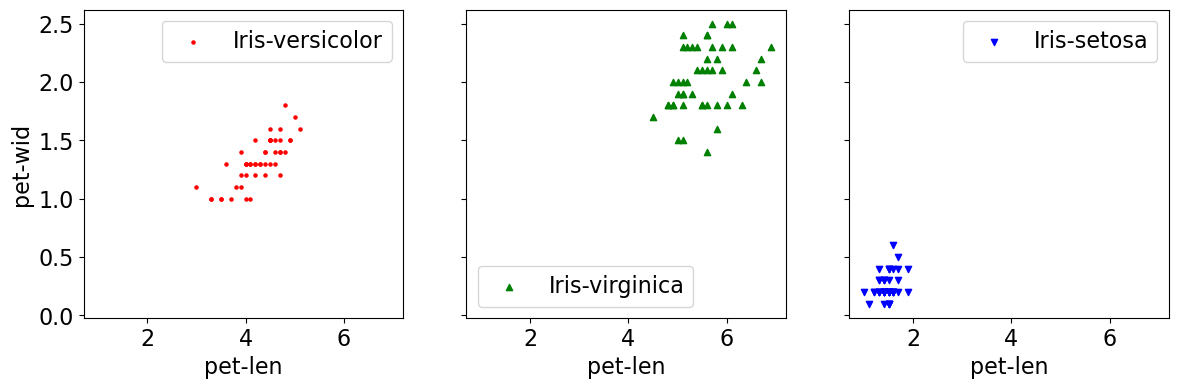

In [39]:
colors = ["r", "g", "b"]
markers = [".", "^", "v"]

varieties = list(set(iris_df["class"]))

# create a 3 column plot
fig,axes = plt.subplots(ncols=3,figsize=(14,4),sharex=True,sharey=True)
# Plot the sepal length vs the sepal width for each of the 3 classes of flowers.

for i in range(len(varieties)):
    variety = varieties[i]
    df=iris_df[iris_df['class']==variety]
    df.plot.scatter(x='pet-len',y='pet-wid',ax=axes[i],label=variety,marker=markers[i],color=colors[i])